In [1]:
#!/usr/bin/python
import nltk
import numpy as np
import re
import tensorflow as tf
from nltk.tokenize import WordPunctTokenizer
from random import randint

Importing Glove and  40000 words list 

In [2]:
wordsList = np.load('wordsList.npy')
print('Loaded the word list!')
wordsList = wordsList.tolist() #Originally loaded as numpy array
wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load('wordVectors.npy')
print ('Loaded the word vectors!')
print(len(wordsList))
print(wordVectors.shape)
print(wordsList[5066])
print(wordVectors[5066][:])

Loaded the word list!
Loaded the word vectors!
400000
(400000, 50)
closure
[ 0.50653   0.12284  -0.11653  -0.21052  -1.0672   -0.17536   0.16253
  0.76781   0.25517  -0.15995   0.025424 -0.65425  -0.44638  -0.19395
  0.45319   1.0955    0.050096 -0.36712   0.1729    0.28393   0.85448
 -0.54932  -1.1816    0.066158 -0.58561  -0.84893   0.1947    0.37832
  0.94141   0.62982   2.3869   -0.41035  -0.11599   0.049907 -0.41563
 -0.056999  1.5044   -0.93772  -0.16045   0.80019  -0.44448  -0.50036
  0.065875  0.27778  -0.27505  -0.012317 -0.37458   0.49171  -0.35498
  0.035347]


Extract data from Affective Text a News Headlines from Google News or CNN

In [3]:
dataset = "Affective_Text/affectivetext_trial.xml"
f = open(dataset, 'r+')
linea = f.readline()
_id = []
sentences = []

#--------------------Extracting Id && sentences from corpus
while linea != "":    
    #print(linea.split("#"))
    linea = linea.split("#")
    _id.append(linea[0])
    sentences.append(linea[1])
    linea = f.readline()
f.close()
print(_id[0]," ",sentences[0])

1   Mortar assault leaves at least 18 dead



Extracting Emotion from Affective Text dataset : {happiness, sadness, anger, disgust, surprise, and fear}

In [4]:
dataset = "Affective_Text/affectivetext_trial.emotions.gold"
f = open(dataset, 'r+')
linea = f.readline()
emotions = []
#--------------------Extracting the most high emotion 
while linea != "":    
    linea = linea.split(" ")
    linea.pop(0)
    _max = linea.index(max(linea))
    emotions.append(_max)
    linea = f.readline()
f.close()
print(emotions)

[4, 3, 3, 2, 5, 3, 3, 5, 3, 3, 3, 4, 3, 5, 4, 0, 3, 4, 3, 4, 3, 2, 3, 5, 0, 3, 1, 2, 5, 2, 1, 3, 3, 0, 3, 2, 0, 4, 2, 5, 4, 4, 5, 4, 4, 2, 4, 5, 2, 2, 2, 1, 0, 3, 3, 4, 5, 5, 0, 1, 2, 4, 2, 5, 3, 5, 2, 2, 4, 3, 5, 2, 0, 0, 0, 3, 1, 4, 3, 5, 1, 2, 3, 3, 3, 5, 5, 2, 0, 3, 3, 4, 3, 4, 3, 0, 2, 0, 2, 2, 0, 1, 1, 3, 3, 4, 3, 3, 3, 4, 5, 4, 1, 2, 0, 4, 0, 3, 3, 0, 5, 3, 0, 2, 0, 0, 1, 2, 3, 3, 1, 2, 5, 4, 2, 0, 0, 0, 5, 3, 3, 2, 0, 1, 3, 4, 2, 3, 5, 5, 5, 3, 3, 2, 4, 4, 4, 0, 2, 5, 5, 0, 2, 2, 2, 5, 2, 3, 3, 4, 1, 3, 3, 5, 4, 4, 3, 3, 2, 2, 5, 5, 5, 5, 1, 5, 3, 4, 3, 0, 0, 5, 0, 4, 0, 2, 4, 2, 3, 1, 3, 4, 4, 5, 4, 4, 0, 3, 2, 1, 0, 4, 4, 1, 0, 5, 0, 2, 5, 3, 5, 3, 5, 5, 3, 0, 3, 0, 2, 5, 3, 4, 3, 3, 3, 5, 3, 3, 0, 5, 3, 5, 4, 4, 5, 4, 3, 3, 2, 1]


Preprocesing of Sentences

In [5]:
def decontracted(phrase):
    # specific
    '''phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)'''

    if phrase == "t":
        phrase = "not"
    elif phrase == "re":
        phrase = "are"
    elif phrase == "s":
        phrase = "is"
    elif phrase == "d":
        phrase = "would"
    elif phrase == "ve":
        phrase = "have"
    elif phrase == "m":
        phrase = "am"
    elif phrase == "ca":
        phrase = "can"
    elif phrase == "isn":
        phrase = "is"
    elif phrase == "aren":
        phrase = "are"
    elif phrase == "wouldn":
        phrase = "would"

    # general
    '''phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)'''
    return phrase

In [6]:
c_sent = sentences[:]
for s in range(0,len(c_sent)):
    print(c_sent[s])
    c_sent[s] = c_sent[s].lower()
    c_sent[s] = WordPunctTokenizer().tokenize(c_sent[s])#nltk.word_tokenize(c_sent[s])
    #print(c_sent[s])
    for word in range(0,len(c_sent[s])):
        c_sent[s][word] = decontracted(c_sent[s][word])
        c_sent[s][word] = re.sub(r'[^a-zA-Z0-9\s]', ' ', c_sent[s][word])

    for i in c_sent[s]:
        if i == ' ' or i == '  ':
            c_sent[s].remove(i)
    print(c_sent[s])
    print("-----------")
print(c_sent[0])

Mortar assault leaves at least 18 dead

['mortar', 'assault', 'leaves', 'at', 'least', '18', 'dead']
-----------
Goal delight for Sheva

['goal', 'delight', 'for', 'sheva']
-----------
Nigeria hostage feared dead is freed

['nigeria', 'hostage', 'feared', 'dead', 'is', 'freed']
-----------
Bombers kill shoppers

['bombers', 'kill', 'shoppers']
-----------
Vegetables, not fruit, slow brain decline

['vegetables', 'not', 'fruit', 'slow', 'brain', 'decline']
-----------
PM: Havana deal a good experiment

['pm', 'havana', 'deal', 'a', 'good', 'experiment']
-----------
Kate is marrying Doherty

['kate', 'is', 'marrying', 'doherty']
-----------
NASA revisiting life on Mars question

['nasa', 'revisiting', 'life', 'on', 'mars', 'question']
-----------
Happy birthday, iPod

['happy', 'birthday', 'ipod']
-----------
Alonso would be happy to retire with three titles

['alonso', 'would', 'be', 'happy', 'to', 'retire', 'with', 'three', 'titles']
-----------
Madonna's New Tot 'Happy at Home' in Lon

Les't determine the total and average number of words in each sentences

In [7]:
numWords = []
for s in c_sent:
    counter = len(s)
    numWords.append(counter) 
print("Average: ",int(sum(numWords)/len(numWords)))

Average:  6


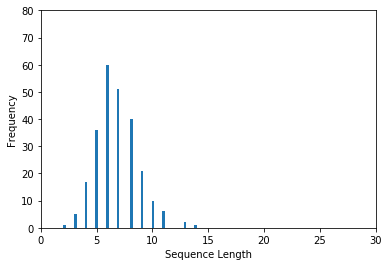

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(numWords, 50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axis([0, 30, 0, 80])
plt.show()

Converting each sentence into a vector and adding it into a matrix of 'ids'

In [9]:
maxSeqLength = int(sum(numWords)/len(numWords)) #Maximum length of sentence
X_train = np.zeros((len(c_sent), maxSeqLength)) #250 X 6 (numEjem X Maximun)
i = 0
for s in c_sent:
    vector = np.zeros((maxSeqLength), dtype='int32')
    bound = maxSeqLength
    if len(s) < maxSeqLength:
        bound = len(s)    
    
    for token in range(0,bound):
        if s[token] not in wordsList:
            vector[token] = (-1)
        else:
            vector[token] = (wordsList.index(s[token]))
    X_train[i] = (vector)
    i += 1
print("Sentences integer representation: ",(X_train.shape))
print("Sentences: ",len(c_sent))
print("Integer format",X_train[249])
print("Normal format",c_sent[249])

Sentences integer representation:  (250, 6)
Sentences:  250
Integer format [  38.   32.   81. 1525. 3747.    0.]
Normal format ['who', 'are', 'you', 'calling', 'fat']


Writting the labels : Y train Labels

In [10]:
Y_train = np.zeros((len(emotions), 5))

for e in range(0,len(emotions)):
    vector = np.zeros((5))
    vector[(emotions[e] % 6) - 1] = 1 
    Y_train[e] = vector
print("Y_train: ",Y_train.shape," Num Ejem X 5 clases")
print("X_train: ",X_train.shape," Num Ejem X Maximun Lengh")

Y_train:  (250, 5)  Num Ejem X 5 clases
X_train:  (250, 6)  Num Ejem X Maximun Lengh


RNN Model

In [21]:
batchSize = 50 #Tiene que ser multiplo del NumEjem
lstmUnits = 64
numClasses = 5
iterations = 10

Declarando placeholders para los labels (5 emotions) && data imput

In [12]:
import tensorflow as tf
tf.reset_default_graph()
numDimensions = 300 

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

Embeddings: Le damos el formato a nuestra data, aún no compilamos nada, solo declaramos

In [13]:
data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

LSTM Model

In [14]:
lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

In [15]:
weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

In [16]:
correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

In [17]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

Tensorboar

In [18]:
import datetime
def board(sess):
    tf.summary.scalar('Loss', loss)
    tf.summary.scalar('Accuracy', accuracy)
    tf.summary.histogram("Histogrma/hAccu", accuracy)
    merged = tf.summary.merge_all()
    logdir = "board/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
    writer = tf.summary.FileWriter(logdir, sess.graph)
    return merged,writer

In [19]:
# Initializing the variables
init = tf.global_variables_initializer()
display_step = 1
numEjemplos = 250

In [22]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    #Calling tensorboard function
    merged,writer = board(sess)
    
    # Training cycle
    for epoch in range(iterations):
        avg_cost = 0.
        total_batch = int(numEjemplos/batchSize)
        
        #Create X groups of (50,5) Labels && (50,maximum) Examples
        X_batches = np.array_split(matrix, total_batch)
        Y_batches = np.array_split(Y_train, total_batch)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = X_batches[i], Y_batches[i]
            #print("X: ",batch_x.shape)
            #print("Y: ",batch_y.shape)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c , accu= sess.run([optimizer, loss, accuracy], feed_dict={input_data: batch_x,
                                                          labels: batch_y})
            # Compute average loss
            avg_cost += c / total_batch

            #Write summary to Tensorboard
            '''if (epoch % 10 == 0):
                summary = sess.run(merged, {input_data: batch_x, labels: batch_y})
                writer.add_summary(summary, epoch)'''
            

            #Save the network every 10,000 training iterations
            #if (i % 10000 == 0 and i != 0):
                # save_path = saver.save(sess, "models/pretrained_lstm.ckpt", global_step=i)
                 # print("saved to %s" % save_path)
            writer.close()

        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost)," accuracy=", "{:.9f}".format(accu))
    print("Optimization Finished!")
    
    #Test Model LSTM
    '''iterations = 10
    for i in range(iterations):
        X_batches = np.array_split(matrix, total_batch)
        Y_batches = np.array_split(Y_train, total_batch)
        for i in range(total_batch):
            batch_x, batch_y = X_batches[i], Y_batches[i]
        
        print("Accuracy for this batch:", (sess.run(accuracy, {input_data: batch_x, labels: batch_y})) * 100)
    '''
    

Epoch: 0001 cost= 2.000805473  accuracy= 0.280000001
Epoch: 0002 cost= 1.748651886  accuracy= 0.360000014
Epoch: 0003 cost= 1.485746455  accuracy= 0.500000000
Epoch: 0004 cost= 1.431322718  accuracy= 0.579999983
Epoch: 0005 cost= 1.325514746  accuracy= 0.540000021
Epoch: 0006 cost= 1.259200168  accuracy= 0.579999983
Epoch: 0007 cost= 1.244510078  accuracy= 0.620000005
Epoch: 0008 cost= 1.182008290  accuracy= 0.680000007
Epoch: 0009 cost= 1.086495078  accuracy= 0.699999988
Epoch: 0010 cost= 1.101381373  accuracy= 0.620000005
Optimization Finished!
